In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from robot_model import *

In [24]:
robot = CDPR4(pos=np.array([0,0,1000]))

def u(t):
    return 100* np.sin(t)*np.ones((4,1))

# System dynamics
def system(X, t):
    dXdt = robot.B() @ u(t)  + np.array([0, 0, 0, 0, 0, -g]).reshape((6,1))
    # print(dXdt.flatten().shape)
    return dXdt.flatten()

# Time array
t = np.linspace(0, 20, 1000)

# Initial conditions [x0, v0]
X0 = np.array([0,0,1000,0,0,0])

# Solve ODE
solution = odeint(system, X0, t)

# Extract position
position = solution[:, 0]


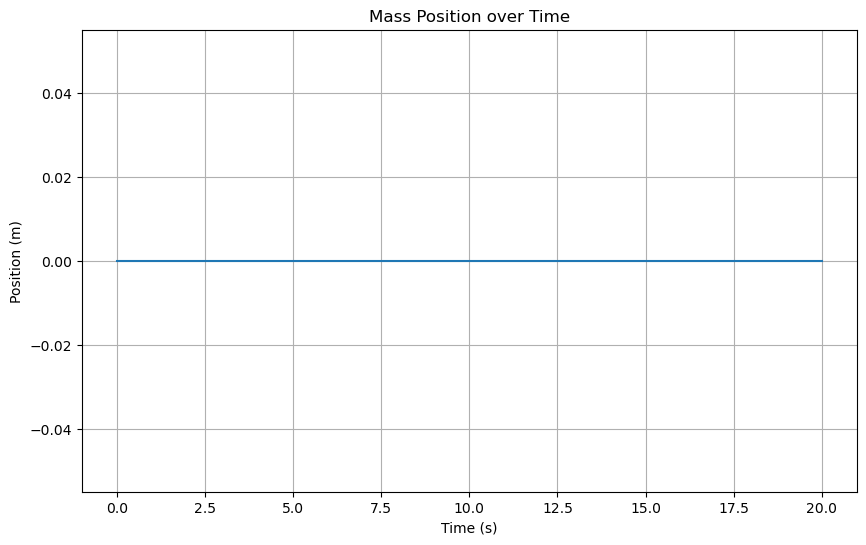

Maximum position: 0.00 m
Minimum position: 0.00 m


In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, position)
plt.title('Mass Position over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.show()

# Print max and min positions
print(f"Maximum position: {np.max(position):.2f} m")
print(f"Minimum position: {np.min(position):.2f} m")